In [115]:
import sys
import json
import numpy as np
#import cupy as np
import pandas as pd
GPU = True

In [3]:
# 데이터 형태 확인

In [119]:
file_str = "024.에세이 글 평가 데이터/01.데이터/1.Training/라벨링데이터/글짓기/글짓기_중등_1학년_ESSAY_33629.json"

In [120]:
a_json = open(file_str, encoding = 'utf-8')
a_dict = json.load(a_json)

In [121]:
a_dict

{'paragraph': [{'paragraph_txt': '내가 생각하는 미래 도시는 AI 로봇들이 우리들의 일을 도와주고 건물들이 100층이 기본이 될꺼같다.#@문장구분# 미래에는 하늘에 드론이 엄청 많이 날아다닐 거 같다.#@문장구분#그런 드론들이 우리들이 배달을 도와주고 택배를 운송을 도와줄거 같다.#@문장구분# 그리고 공중에 지하철이 다닐 수 있는 지하철이 다닐 것 같다.#@문장구분# 버스는 지하로 다니고 비행기는 10분이면 다 가는 그런 미래가 발달 할거같다. #@문장구분#그리고 하늘을 날아다니는 자동차가 발달 될거 같고 자동주행 자전거랑 오토바이가 생길 것 같다.#@문장구분# 그리고 로봇들도 우리의 친구가 되어서 수다 떨고 쇼핑도 다니는 나를 공감해주는 그런 로봇들이 생겨나서 힘든 사람들도 힘을 낼수있는 그런 사회가 발달 될것같다.#@문장구분# 그리고 우주인들도 우리별에 놀러와서 같이 놀면서 우주선도 같이타고 우리는 외계인 나라로 가서 같이 사이좋게 지낼 것 같다.#@문장구분# 그러고 바다를 속을 지나갈수 있게 바다사이를 지나가면 바다가 갈라지면서 바다안을 지나갈수 있을 것 같다.#@문장구분# 그리고 엄청 멀리 있는데 차가 차를 깜박하고 집에 못올수있는 상황을 대비해 박수를 연속으로 3번 치면 오는 차가 발달됐으면 좋겠다. 빨리 미래가 되면 좋겠다.#@문장구분#',
   'paragraph_len': 762,
   'paragraph_id': '001'}],
 'score': {'paragraph_score': [{'paragraph_scoreT': [2.5, 3, 2],
    'paragraph_scoreT_detail': {'paragraph_scoreT_exp': [[2, 3, 0],
      [3, 3, 0],
      [2, 2, 0]]},
    'paragraph_scoreT_avg': 2.5,
    'paragraph_id': '001'}],
  'essay_scoreT': [27.5, 28.5, 23.35],
  'essay

In [122]:
# 데이터 불러오기

In [205]:
def get_data(data, path):
    ids, grades, etypes, essay, levels, scores =[], [], [], [], [], []  
    for row in tqdm(data.itertuples(), total=data.shape[0]):   
        file_str = path + row.file_name                       
        
        
        text = open(file_str, encoding = 'utf-8')
        text = json.load(text)
        
        txt = text['paragraph'][0]['paragraph_txt']
        paragraph_score = text['score']['paragraph_score'][0]['paragraph_scoreT_avg'] # paragraph score data 가져오기 
        essay_score = text['score']['essay_scoreT_avg']                               # essay score data 가져오기 
        score = paragraph_score + essay_score    # score 더하기 

        ids.append(text['info']['essay_id'])         # essay_id
        grades.append(text['rubric']['essay_grade']) # 학년 
        etypes.append(text['info']['essay_type'])    # 글 종류
        essay.append(txt)
        levels.append(text['info']['essay_level'])   # 각 글의 level
        scores.append(score)                         # score data 

    df= pd.DataFrame({'id': ids, 'grade': grades, 'etype':etypes, 'essay':essay, 'levels': levels, 'scores': scores})  # 리스트로 dataframe 만들기 
    return df 

In [206]:
text_type = ['글짓기','대안제시', '설명글', '주장', '찬성반대']   # 글 5가지 종류 

In [207]:
from os import listdir
from tqdm import tqdm

# Get Test Data 
path ='024.에세이 글 평가 데이터/01.데이터/1.Training/라벨링데이터/'
main_df_train = pd.DataFrame()

for i in range(5):
    paths = path + text_type[i]+'/'   # 경로 지정 
    fileNameList = listdir(paths)      # 해당 경로에 포함된 파일 리스트를 모두 가져옴

    df= pd.DataFrame(fileNameList, columns=['file_name'])     # 파일 리스트 -> 데이터 프레임화 
    df=df.astype('string')                                    # df type string 으로 변경 
    
    sub_df_train = get_data(df, paths)                          # 데이터 가져오는 함수
    main_df_train = pd.concat([main_df_train, sub_df_train])          

100%|█████████████████████████████████████████████████████████████████████████████| 6687/6687 [00:14<00:00, 463.58it/s]


In [219]:
main_df_test

,id,grade,etype,essay,levels,scores
0,ESSAY_33983,고등_1학년,글짓기,우리는 태어날 때 부모님의 배 속에서 눈 코 입 등 몸이 형성된 채로 태어난다.#...,2,27.370367
1,ESSAY_33984,고등_1학년,글짓기,며칠 전 친할아버지께서 큰 사고를 당하셨다.#@문장구분# 오토바이를 타고 내리막길을...,2,30.333333
2,ESSAY_33987,고등_1학년,글짓기,예전에 오빠가 재수학원을 다니고 있을 때였다.#@문장구분# 나는 집에서 부모님과 함...,2,28.851851
3,ESSAY_33997,고등_1학년,글짓기,가끔씩 그럴 때가 있었다.#@문장구분# 이럴 땐 누가 어떻게 해줬었는데 라고 생각되...,2,29.351853
4,ESSAY_34083,고등_1학년,글짓기,저는 중학교때 저의 친한친구와 같은 학원을 다닌적이 있습니다.#@문장구분# 그래서 ...,2,25.000000
...,...,...,...,...,...,...
5901,ESSAY_84775,초등_6학년,찬성반대,저는 전기를 절약을 하기 위해서는 사용을 하지 않는 불을 꼭 끄고다녀야한다고 생각을...,2,29.925926
5902,ESSAY_84797,초등_6학년,찬성반대,제가 에너지 절약에 대하여 생각하는 의견은 굳이...?라는 생각이 듭니다.#@문장구...,2,29.637037
5903,ESSAY_84814,초등_6학년,찬성반대,저는 에너지를 절약하는 것이 좋을 것 같다고 생각합니다.#@문장구분# 왜냐하면 에너...,2,29.933335
5904,ESSAY_84822,초등_6학년,찬성반대,나는 에너지를 쓰는 것을 줄이면서 에너지를 아껴야 한다고 생각한다.#@문장구분# 왜...,2,31.666666


In [213]:
high_1 = main_df_train.loc[main_df_train['grade'] == '고등_1학년', 'scores'].mean()
high_2 = main_df_train.loc[main_df_train['grade'] == '고등_2학년', 'scores'].mean()
high_3 = main_df_train.loc[main_df_train['grade'] == '고등_3학년', 'scores'].mean()
mid_1 = main_df_train.loc[main_df_train['grade'] == '중등_1학년', 'scores'].mean()
mid_2 = main_df_train.loc[main_df_train['grade'] == '중등_2학년', 'scores'].mean()
mid_3 = main_df_train.loc[main_df_train['grade'] == '중등_3학년', 'scores'].mean()
ele_6 = main_df_train.loc[main_df_train['grade'] == '초등_6학년', 'scores'].mean()

In [214]:
Writing = main_df_train.loc[main_df_train['etype'] == '글짓기', 'scores'].mean()
Alternative_Proposal = main_df_train.loc[main_df_train['etype'] == '대안제시', 'scores'].mean()
Explanation = main_df_train.loc[main_df_train['etype'] == '설명글', 'scores'].mean()
Argument = main_df_train.loc[main_df_train['etype'] == '주장', 'scores'].mean()
Support_Opposition = main_df_train.loc[main_df_train['etype'] == '찬성반대', 'scores'].mean()

Text(0.5, 1.0, 'score of each grade')

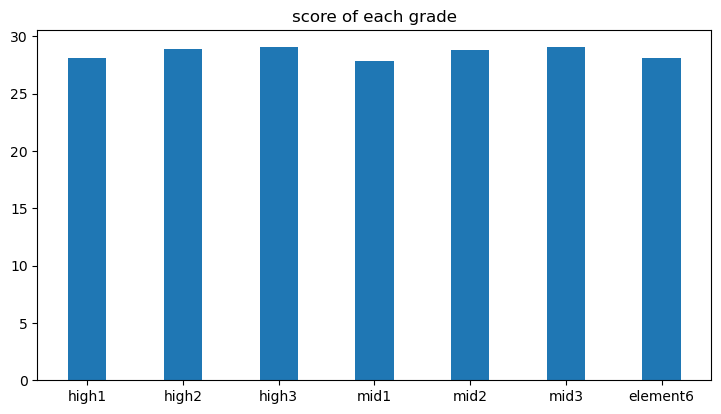

In [215]:
import matplotlib.pyplot as plt

# 학년별 점수 비교

categories = ['high1','high2','high3','mid1','mid2','mid3','element6' ]
values = [high_1, high_2, high_3, mid_1, mid_2, mid_3, ele_6,]

plt.figure(figsize=(40, 10))
plt.subplot(2, 4, 3)
plt.bar(categories, values, width=0.4)
plt.title('score of each grade')

Text(0.5, 1.0, 'score of each category')

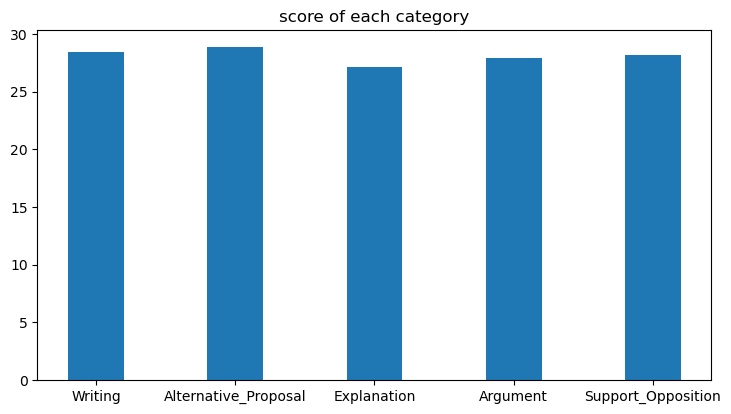

In [216]:
import matplotlib.pyplot as plt

# 글 종류별 점수 비교

categories = ['Writing','Alternative_Proposal','Explanation','Argument','Support_Opposition']
values = [Writing, Alternative_Proposal, Explanation, Argument, Support_Opposition]

plt.figure(figsize=(40, 10))
plt.subplot(2, 4, 3)
plt.bar(categories, values, width=0.4)
plt.title('score of each category')

In [208]:
# Get Train data
path ='024.에세이 글 평가 데이터/01.데이터/2.Validation/라벨링데이터/'
main_df_test = pd.DataFrame()

for i in range(5):
    paths = path + text_type[i]+'/'   # 경로 지정 
    fileNameList = listdir(paths)      # 해당 경로에 포함된 파일 리스트를 모두 가져옴

    df= pd.DataFrame(fileNameList, columns=['file_name'])     # 파일 리스트 -> 데이터 프레임화 
    df=df.astype('string')                                    # df type string 으로 변경 
    
    sub_df_test = get_data(df, paths)                          # 데이터 가져오는 함수
    main_df_test = pd.concat([main_df_test, sub_df_test])   

100%|███████████████████████████████████████████████████████████████████████████████| 988/988 [00:03<00:00, 277.87it/s]


In [209]:
# 인덱스 정렬
main_df_train = main_df_train.reset_index(drop=True)
main_df_test = main_df_test.reset_index(drop=True)

In [210]:
# 형태소 분리

#https://kugancity.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-%EA%B4%80%EB%A0%A8-%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4-%EC%A0%95%EB%A6%AC

In [218]:
train = []

for i in range(39591):
    train.append(main_df_train['essay'][i])

In [220]:
test = []

for i in range(5906):
    test.append(main_df_test['essay'][i])

In [221]:
test[0]

"우리는 태어날 때 부모님의 배 속에서  눈 코 입 등 몸이 형성된 채로 태어난다.#@문장구분# 물론 안 그런 사람들도 있겠지만 대다수 사람은 그렇다.#@문장구분# 그래서 몇몇 사람들은 자신이 태어나면서부터 가지게 된 몸의 중요성을 인지하지 못하고 당연하다는 듯이, 원래 있어야 한다는 듯이 생활하기도 한다.#@문장구분# 그러한 사람 중 한 명이 바로 나였다.#@문장구분# 여기서 '였다' 붙이는 이유는 예전에 그렇게 생각을 하였고 지금은 반성하고 고쳤기 때문이다.#@문장구분#  내가 초등학교 4학년 때 처음으로 '스마트폰' 이라는 것을 가지게 되었다.#@문장구분# 그전까지만 해도 하루에 몇 분 정도 보는 '텔레비전'이 다였고 거의 책을 읽으며 생활했다.#@문장구분# 하지만 내가 초등학교 4학년 때 학원에 다니기 시작하면서 부모님께서 '스마트폰'을 사주셨고 그 이후로 내 생활은 완전히 달라지기 시작하였다.#@문장구분# 스마트폰을 가지기 전까지는 하루에 4~5권씩 책을 읽었지만 스마트폰을 가지고 나서는 2~3권으로 줄었다.#@문장구분# 그리고 스마트폰이 생긴 이후로 할 일을 다 하고 나서 무조건 스마트폰으로 게임을 하거나 유튜브를 보았다.#@문장구분#이렇게 생활하다 보니 아침에 자고 일어나면 당연하게 선명히 보이던 사물들이 조금씩 흐려 보였고 그래도 '내 눈은 당연히 나빠지지 않을 거야.#@문장구분# 태어날 때부터 주어진 게 바뀌겠어?' 라는 생각으로 스마트폰을 많이 하게 되었고 결국 초등학교 5학년을 들어가고 안경을 쓰게 되었다.#@문장구분# 나는 이때까지 '안경'을 쓴다는 것은 나와 상관없는 일 일줄 알았는데 이렇게 갑자기 '안경'을 쓰면서 생활을 해야한다니 너무 황당했고 속상했다. #@문장구분# 당연히 내 시력은 안바뀔 줄 알았고 내가 무슨 짓을 하더라도 항상 높을 줄 알았지만 아니었던 것이었다.#@문장구분# 이 사실이 어린 나에게 너무 크게 와닿았고 그 이후로 한 번 낮아진 시력을 되돌리기에는 너무 늦었기에 더 좋아질 순 없지만 더 나빠지지만 말자는 생각으로

In [139]:
# 문장구분 제거
word_to_remove1 = "#@문장구분#"
word_to_remove2 = '\n'

def remove_word_from_sentence(sentence, word):
    
    updated_sentence = sentence.replace(word, '').replace(word.capitalize(), '').replace(word.upper(), '')

    return updated_sentence

for i in range(len(train)):
    train[i] = remove_word_from_sentence(train[i], word_to_remove1)
    train[i] = remove_word_from_sentence(train[i], word_to_remove2)
    
for i in range(len(test)):
    test[i] = remove_word_from_sentence(test[i], word_to_remove1)
    test[i] = remove_word_from_sentence(test[i], word_to_remove2)


In [140]:
# 확인
test[0]

"우리는 태어날 때 부모님의 배 속에서  눈 코 입 등 몸이 형성된 채로 태어난다. 물론 안 그런 사람들도 있겠지만 대다수 사람은 그렇다. 그래서 몇몇 사람들은 자신이 태어나면서부터 가지게 된 몸의 중요성을 인지하지 못하고 당연하다는 듯이, 원래 있어야 한다는 듯이 생활하기도 한다. 그러한 사람 중 한 명이 바로 나였다. 여기서 '였다' 붙이는 이유는 예전에 그렇게 생각을 하였고 지금은 반성하고 고쳤기 때문이다.  내가 초등학교 4학년 때 처음으로 '스마트폰' 이라는 것을 가지게 되었다. 그전까지만 해도 하루에 몇 분 정도 보는 '텔레비전'이 다였고 거의 책을 읽으며 생활했다. 하지만 내가 초등학교 4학년 때 학원에 다니기 시작하면서 부모님께서 '스마트폰'을 사주셨고 그 이후로 내 생활은 완전히 달라지기 시작하였다. 스마트폰을 가지기 전까지는 하루에 4~5권씩 책을 읽었지만 스마트폰을 가지고 나서는 2~3권으로 줄었다. 그리고 스마트폰이 생긴 이후로 할 일을 다 하고 나서 무조건 스마트폰으로 게임을 하거나 유튜브를 보았다.이렇게 생활하다 보니 아침에 자고 일어나면 당연하게 선명히 보이던 사물들이 조금씩 흐려 보였고 그래도 '내 눈은 당연히 나빠지지 않을 거야. 태어날 때부터 주어진 게 바뀌겠어?' 라는 생각으로 스마트폰을 많이 하게 되었고 결국 초등학교 5학년을 들어가고 안경을 쓰게 되었다. 나는 이때까지 '안경'을 쓴다는 것은 나와 상관없는 일 일줄 알았는데 이렇게 갑자기 '안경'을 쓰면서 생활을 해야한다니 너무 황당했고 속상했다.  당연히 내 시력은 안바뀔 줄 알았고 내가 무슨 짓을 하더라도 항상 높을 줄 알았지만 아니었던 것이었다. 이 사실이 어린 나에게 너무 크게 와닿았고 그 이후로 한 번 낮아진 시력을 되돌리기에는 너무 늦었기에 더 좋아질 순 없지만 더 나빠지지만 말자는 생각으로 아침에 블루베리를 먹는다던가, 스마트폰 사용을 줄인다던가, 책이나 노트북 등을 너무 가까이서 보지 않는 등 여러 노력을 하였고 지금도 하고있는 중이다. 이 글을 쓰고 난 후에

In [141]:
# 형태소 분리

import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

okt = Okt()
train_splited = []
test_splited = []

for i in tqdm(range(len(train))):
    text = train[i]
    train_splited.append(okt.morphs(text))
    
for i in tqdm(range(len(test))):
    text = test[i]
    test_splited.append(okt.morphs(text))

100%|██████████████████████████████████████████████████████████████████████████████| 5906/5906 [04:18<00:00, 22.87it/s]


In [223]:
test_splited[0]

['우리',
 '는',
 '태어날',
 '때',
 '부모님',
 '의',
 '배',
 '속',
 '에서',
 '눈',
 '코',
 '입',
 '등',
 '몸',
 '이',
 '형성',
 '된',
 '채',
 '로',
 '태어난다',
 '.',
 '물론',
 '안',
 '그런',
 '사람',
 '들',
 '도',
 '있겠지만',
 '대다수',
 '사람',
 '은',
 '그렇다',
 '.',
 '그래서',
 '몇몇',
 '사람',
 '들',
 '은',
 '자신',
 '이',
 '태어나면서부터',
 '가지',
 '게',
 '된',
 '몸',
 '의',
 '중요성',
 '을',
 '인지',
 '하지',
 '못',
 '하고',
 '당연하다는',
 '듯이',
 ',',
 '원래',
 '있어야',
 '한다는',
 '듯이',
 '생활',
 '하기도',
 '한다',
 '.',
 '그러한',
 '사람',
 '중',
 '한',
 '명',
 '이',
 '바로',
 '나였다',
 '.',
 '여기',
 '서',
 "'",
 '였다',
 "'",
 '붙이는',
 '이유',
 '는',
 '예전',
 '에',
 '그렇게',
 '생각',
 '을',
 '하였고',
 '지금',
 '은',
 '반성',
 '하고',
 '고쳤기',
 '때문',
 '이다',
 '.',
 '내',
 '가',
 '초등학교',
 '4',
 '학년',
 '때',
 '처음',
 '으로',
 "'",
 '스마트폰',
 "'",
 '이라는',
 '것',
 '을',
 '가지',
 '게',
 '되었다',
 '.',
 '그',
 '전',
 '까지만',
 '해도',
 '하루',
 '에',
 '몇',
 '분',
 '정도',
 '보는',
 "'",
 '텔레비전',
 "'",
 '이',
 '다',
 '였고',
 '거의',
 '책',
 '을',
 '읽으며',
 '생활',
 '했다',
 '.',
 '하지만',
 '내',
 '가',
 '초등학교',
 '4',
 '학년',
 '때',
 '학원',
 '에',
 '다니기',
 '시작',
 '하면서',


In [22]:
# 임베딩
# https://wikidocs.net/50739
# https://comlini8-8.tistory.com/6
# https://ebbnflow.tistory.com/153

In [224]:
#word2vec, 임베딩

combined_splited = train_splited + test_splited

from gensim.models import Word2Vec
word2vec = Word2Vec(combined_splited, vector_size=100, window=5, min_count=1, workers=1, sg=0)

In [225]:
# 확인
model_result = word2vec.wv.most_similar('우리')
print(model_result)

[('인류', 0.5556796193122864), ('저희', 0.539256751537323), ('우리나라', 0.5203955769538879), ('누군가', 0.5193637609481812), ('나', 0.4803834557533264), ('저', 0.45948776602745056), ('지구', 0.45930734276771545), ('평등한', 0.44573530554771423), ('인간', 0.44278591871261597), ('우린', 0.43898263573646545)]


In [149]:
# train data to vector & generate train,test data

X_train = np.zeros((39591,2084,100), dtype ='f')

for i in range(39591):
    for idx, word in enumerate(train_splited[i]):
        vector = word2vec.wv[word]
        X_train[i,idx,:] = vector

In [150]:
y_train = np.zeros((39591,1), dtype ='f')

for i in range(39591):
    y_train[i] = main_df_train['scores'][i]

In [151]:
X_test = np.zeros((5906,2084,100), dtype ='f')

for i in range(5906):
    for idx, word in enumerate(test_splited[i]):
        vector = word2vec.wv[word]
        X_test[i,idx,:] = vector

In [152]:
y_test = np.zeros((5906,1), dtype ='f')

for i in range(5906):
    y_test[i] = main_df_test['scores'][i]

In [153]:
#np.save("X_train", X_train)
#np.save("y_train", y_train)
np.save("X_test", X_test)
np.save("y_test", y_test)